In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display

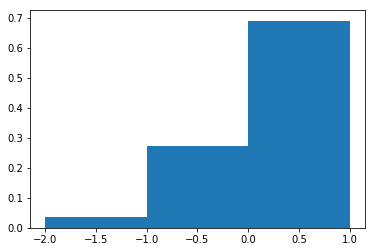

In [214]:
x = np.random.normal(1, 1, 10000)
a = plt.hist(x, normed=1, range=(-2, 1), bins=3)
#print(a[0])
plt.show()